In [1]:
import matplotlib
import numpy as np
%matplotlib inline
from scipy import *
from scipy import integrate


from classy import Class


import matplotlib.pyplot as plt

In [2]:
#####################################################
#
# Environment part      
#
#####################################################
global h_bar
global k_B
global mu_0
global epsilon_0
global T_c
h_bar = 1.05457173*10**(-34)      # 1.05457173 × 10-34 m^2 kg / s   6.58211928(15)×10−16 eV·s
k_B = 1.3806488*10**(-23)         # 1.3806488×10−23 J|K-1  8.6173324×10-5 eV|K−1 
mu_0 = 4*pi*10**(-7)              # 4*pi*10**(-7)  1.25663706
epsilon_0 = 8.854187817*10**(-12) # 8.854187817*10**(-12)
T_c = 9.2                        # Kelvin

Rho_c = 2.5 * 10**(-8)            # (Ohm m) MBE(0.1*10^-8) Sputtering(2*10^-8)
Rho_g = 2.5 * 10**(-8)            # (Ohm m) MBE(0.1*10^-8) Sputtering(2*10^-8)
global sigma_cn
global sigma_gn
global delta_0

sigma_cn = 1/Rho_c                # Normal state metal conductivity Al_bulk=3.56*10**7 (S/m)
sigma_gn = 1/Rho_g                # Normal state metal conductivity Al_bulk=3.56*10**7 (S/m)
delta_0 = 1.67*k_B*T_c  #1.674*k_B * T_c #+ 0*1j        # Calculation of delta_0 from Tc relation of BCS (eV)
Thickness = 0.2 * 10**(-6)

print delta_0/1.6/10**(-19), "eV"
#global delta_T
#delta_T = 177.0*10**(-6)         # Al (eV)

0.0013257680102 eV


0.00443745328066 0.0114754283184
7.06242624357e-14 7.0629024262e-14
2.02153914052e-70 2.78961890797e-70


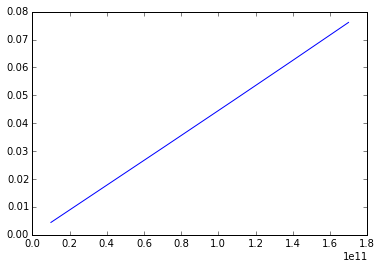

In [7]:
#####################################################
#
# MB part
#
#####################################################
temperature = 0.1
freq = np.linspace(10*10**9, 170*10**9, num=1000)
omegaall = 2.*pi*freq  
def f(T, E):
    if E/k_B/T > 709:
        return 0
    else:
        return 1.0/(np.exp(E/(k_B *T)) + 1.0)
def g1(omega, E):
    return (E**2 + delta_0**2 + h_bar*omega*E) / ((E**2-delta_0**2)**0.5*((E+h_bar*omega)**2-delta_0**2)**0.5)
def g1_1(omega, E):
    if h_bar*omega > 2*delta_0:
        return (E**2 + delta_0**2 + h_bar*omega*E) / ((E**2-delta_0**2)**0.5*((E+h_bar*omega)**2-delta_0**2)**0.5)
    else:
        return 0
def g2(omega, E):
    return (E**2 + delta_0**2 + h_bar*omega*E) / ((delta_0**2-E**2)**0.5*((E+h_bar*omega)**2-delta_0**2)**0.5)
def fsigma1(T, omega):
    sigma_1_1i = lambda E: (2.0/h_bar/omega) * (f(T, E)-f(T, E+h_bar*omega)) * g1(omega, E)
    sigma_1_2i = lambda E: (1.0/h_bar/omega) * (1.0-2.0*f(T, E+h_bar*omega)) * g1_1(omega, E)
    sigma_1_1, error11 = integrate.quad(sigma_1_1i, delta_0, 158.*k_B*T)
    sigma_1_2, error12 = integrate.quad(sigma_1_2i, min(delta_0-h_bar*omega, -delta_0), -delta_0)
    sigma_1 = sigma_1_1 - sigma_1_2
    return sigma_1
def fsigma2(T, omega):
    sigma_2i = lambda E: (1.0/h_bar/omega) * (1.0-2.0*f(T, E+h_bar*omega)) * g2(omega, E)
    sigma_2, error2 =  integrate.quad(sigma_2i, max(delta_0-h_bar*omega, -delta_0), delta_0)
    return sigma_2
sigma_so = np.array([fsigma1(temperature, ome)-1j*fsigma2(temperature, ome) for ome in omegaall])
#sigma_so = fsigma1(temperature, omega)-1j*fsigma2(temperature, omega)

sigma_s = sigma_so * sigma_gn
Z_s = np.sqrt(mu_0*omegaall*1j/sigma_s)*1.0/np.tanh(Thickness * np.sqrt(1j*mu_0*omegaall*sigma_s))
R_s = Z_s.real
X_s = Z_s.imag
L_s = X_s/omegaall
#plt.plot(freq, R_s)
plt.plot(freq, X_s)
#plt.yscale("log")
print X_s[0],X_s[99]
print L_s[0],L_s[49]
print R_s[0],R_s[49]